In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,auc,confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from itertools import cycle

In [5]:
import os
import pandas as pd

# Path to the folder containing the CSV files
folder_path = "/content/Dataset/CICIDS2017"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
print("CSV Files:", csv_files)

CSV Files: ['Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', 'Wednesday-workingHours.pcap_ISCX.csv']


In [6]:
# Load and display the first 79 rows of each dataset
for file in csv_files:
    file_path = os.path.join(folder_path, file)  # Correct file path
    data = pd.read_csv(file_path)  # Read CSV file

    display(data.head(79))


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,88,403,2,2,352,358,176,176,176.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
75,53,208,2,2,64,96,32,32,32.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
76,53,265,2,2,64,158,32,32,32.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
77,53,213,2,2,88,188,44,44,44.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,34805,8003,15,6,19897,0,2896,0,1326.466667,1136.570208,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
75,34805,1,2,0,617,0,617,0,308.500000,436.284884,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
76,21,50,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
77,139,75,3,1,4,4,4,0,1.333333,2.309401,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,389,391938,15,12,4106,1044,1646,0,273.733333,561.908161,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
75,49489,16,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
76,389,401719,15,12,5036,1566,1660,0,335.733333,573.013396,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
77,443,4866509,37,55,138078,6506,24820,0,3731.837838,4323.523059,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
import os
import pandas as pd

# Path to the folder containing the CSV files
folder_path = "/content/Dataset/CICIDS2017"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Load and combine all datasets
data_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
data = pd.concat(data_list, ignore_index=True)  # Combine all into one DataFrame

# Display the shape of the combined dataset
data.shape  # (rows, columns)


(1204915, 79)

In [8]:
print(data.columns.tolist())

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

DATA PREPROCESING

In [9]:
data.columns=data.columns.str.strip()

In [10]:
print(data.columns.tolist())

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [11]:
data.loc[:,'Label'].unique()

array(['BENIGN', 'PortScan', 'DDoS', 'DoS slowloris', 'DoS Slowhttptest',
       'DoS Hulk', 'DoS GoldenEye', 'Heartbleed'], dtype=object)

***Filtering Needed Labels***

In [12]:
selected_labels = ["BENIGN", "DDoS", "DoS Hulk", "PortScan","DoS GoldenEye"]
# Filter dataset to include only the selected labels
df = data[data["Label"].isin(selected_labels)]

# Check if filtering worked
print(df["Label"].value_counts())


Label
BENIGN           665286
DoS Hulk         231073
PortScan         158930
DDoS             128027
DoS GoldenEye     10293
Name: count, dtype: int64


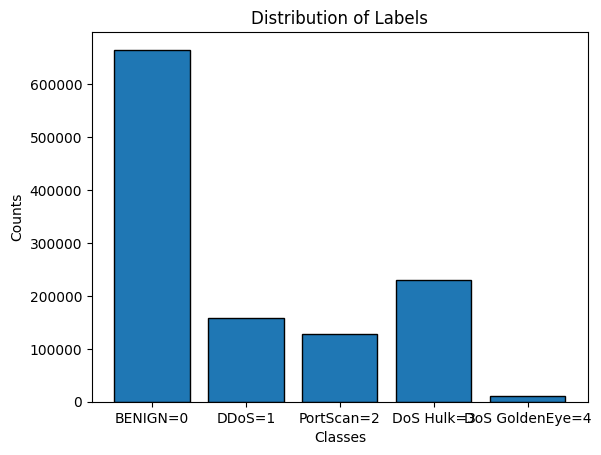

In [13]:
import matplotlib.pyplot as plt

data_f=df.dropna()
# Ensure there are no NaN values in 'Label' before plotting
data_f = data_f.dropna(subset=['Label'])

plt.hist(data_f['Label'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], edgecolor='black', rwidth=0.8)

# Corrected tick positions to match the labels
plt.xticks([0, 1, 2, 3,4], labels=['BENIGN=0', 'DDoS=1', 'PortScan=2', 'DoS Hulk=3', 'DoS GoldenEye=4'])

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Labels')
plt.show()


Reduce the overrepresented label

In [14]:
# Define the labels to keep
selected_labels = ['BENIGN', 'DDoS', 'DoS Hulk', 'PortScan', 'DoS GoldenEye']

# Filter data for only selected labels
filtered_data = data_f[data_f['Label'].isin(selected_labels)]

# Reduce number of samples for each label (e.g., 3000 each)
benign_data = filtered_data[filtered_data['Label'] == 'BENIGN'].sample(n=3000, random_state=42)
ddos_data = filtered_data[filtered_data['Label'] == 'DDoS'].sample(n=3000, random_state=42)
hulk_data = filtered_data[filtered_data['Label'] == 'DoS Hulk'].sample(n=3000, random_state=42)
portscan_data = filtered_data[filtered_data['Label'] == 'PortScan'].sample(n=3000, random_state=42)
goldeneye_data = filtered_data[filtered_data['Label'] == 'DoS GoldenEye'].sample(n=3000, random_state=42)

# Combine both subsets
reduced_data = pd.concat([benign_data, ddos_data, hulk_data, portscan_data, goldeneye_data])

# Shuffle the combined dataset
reduced_data = reduced_data.sample(frac=1, random_state=42).reset_index(drop=True)


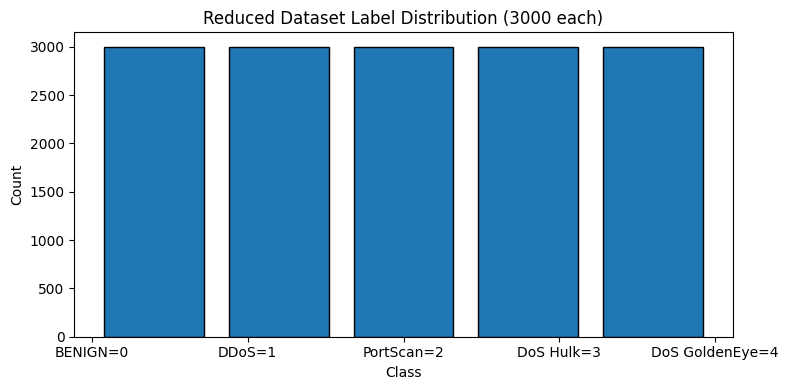

Label
PortScan         3000
DoS Hulk         3000
DoS GoldenEye    3000
BENIGN           3000
DDoS             3000
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt

# Plot label distribution
plt.figure(figsize=(8, 4))
plt.hist(reduced_data['Label'], bins=5, edgecolor='black', rwidth=0.8)
plt.xticks([0, 1, 2, 3, 4], labels=['BENIGN=0', 'DDoS=1', 'PortScan=2', 'DoS Hulk=3', 'DoS GoldenEye=4'])
plt.title("Reduced Dataset Label Distribution (3000 each)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Check class counts
print(reduced_data['Label'].value_counts())


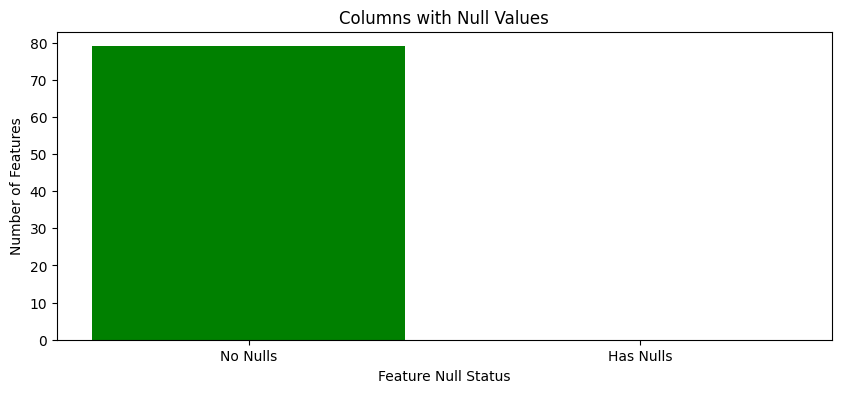

In [16]:
import matplotlib.pyplot as plt

# Count the number of columns with and without missing values
num_no_nulls = (reduced_data.isna().sum() == 0).sum()  # Columns with NO null values
num_with_nulls = (reduced_data.isna().sum() > 0).sum()  # Columns WITH null values

# Data for bar plot
categories = ['No Nulls', 'Has Nulls']
values = [num_no_nulls, num_with_nulls]

plt.figure(figsize=(10, 4))
plt.bar(categories, values, color=['green', 'red'])

# Titles and labels
plt.title('Columns with Null Values')
plt.xlabel('Feature Null Status')
plt.ylabel('Number of Features')

plt.show()


In [17]:
data_f = reduced_data.dropna()

In [18]:
data_f.loc[:,'Label'].unique()

array(['PortScan', 'DoS Hulk', 'DoS GoldenEye', 'BENIGN', 'DDoS'],
      dtype=object)

In [19]:
(data_f.dtypes=='object')

,0
Destination Port,False
Flow Duration,False
Total Fwd Packets,False
Total Backward Packets,False
Total Length of Fwd Packets,False
...,...
Idle Mean,False
Idle Std,False
Idle Max,False
Idle Min,False


*----------------------------------------------------*

TARGET VARIAVLE CONVERTED TO NUMERICAL VALUES

In [20]:
data_f.loc[:, 'Label'] = data_f['Label'].map({'BENIGN': 0, 'PortScan': 1, 'DDoS': 2, 'DoS Hulk': 3, 'DoS GoldenEye': 4}).fillna(-1).astype(int)

In [21]:
data_f.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,3837.849000,2.210433e+07,4.604000,3.750067,298.144200,5.485672e+03,185.989533,6.039600,43.541050,72.425443,...,1.848667,27.425867,9.730898e+04,1.256586e+04,1.189807e+05,9.011050e+04,1.852009e+07,1.110801e+06,1.930883e+07,1.772551e+07
std,11853.479004,3.661448e+07,10.821432,15.662480,1205.171578,2.637746e+04,585.617184,42.686992,154.152106,244.144819,...,8.456595,6.949647,5.804896e+05,1.996453e+05,7.334560e+05,5.608845e+05,3.391453e+07,7.398990e+06,3.492033e+07,3.370502e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,8.400000e+01,2.000000,1.000000,2.000000,6.000000e+00,2.000000,0.000000,2.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,1.236552e+06,3.000000,2.000000,30.000000,1.480000e+02,20.000000,0.000000,8.666667,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,1.541828e+07,7.000000,5.000000,349.000000,1.159500e+04,334.000000,2.000000,50.714286,126.583610,...,2.000000,32.000000,9.122500e+02,0.000000e+00,9.122500e+02,9.120000e+02,1.000000e+07,0.000000e+00,1.000000e+07,9.588624e+06
max,65389.000000,1.199544e+08,600.000000,960.000000,32651.000000,1.577780e+06,11595.000000,1436.000000,2596.400000,5184.100867,...,599.000000,56.000000,1.370000e+07,1.050000e+07,3.010000e+07,1.370000e+07,1.200000e+08,6.650000e+07,1.200000e+08,1.200000e+08


In [22]:
X = data_f.drop('Label',axis=1)
y = data_f['Label']

print("Label Counts After Filtering:")
print(y.value_counts())

Label Counts After Filtering:
Label
1    3000
3    3000
4    3000
0    3000
2    3000
Name: count, dtype: int64


In [23]:
import numpy as np

print("NaN values in X:", np.isnan(X).sum().sum())  # Count total NaN values
print("Infinite values in X:", np.isinf(X).sum().sum())  # Count total inf values

NaN values in X: 0
Infinite values in X: 8


In [24]:
import numpy as np
import pandas as pd

# Future-proof Pandas behavior
pd.set_option('future.no_silent_downcasting', True)

# Replace Inf values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with the max finite value per column
X.fillna(X.max(), inplace=True)

# Remove any remaining Inf values
X = X[~X.isin([np.inf, -np.inf]).any(axis=1)]

# Clip extreme values
X_clipped = X.clip(lower=X.quantile(0.01), upper=X.quantile(0.99), axis=1)

# Explicitly cast float and int columns
for col in X_clipped.select_dtypes(include=['float']).columns:
    X_clipped[col] = X_clipped[col].astype(float)
for col in X_clipped.select_dtypes(include=['int']).columns:
    X_clipped[col] = X_clipped[col].astype(int)

# Print final check
print("NaN values in X:", X_clipped.isna().sum().sum())
print("Infinite values in X:", np.isinf(X_clipped).sum().sum())


NaN values in X: 0
Infinite values in X: 0


In [25]:
print(y.value_counts())
print(data_f['Label'].value_counts())  # Replace 'df' with your actual DataFrame


Label
1    3000
3    3000
4    3000
0    3000
2    3000
Name: count, dtype: int64
Label
1    3000
3    3000
4    3000
0    3000
2    3000
Name: count, dtype: int64


In [26]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Ensure y is properly formatted
y = pd.Series(y)  # Convert to Pandas Series
y = y.fillna(y.mode()[0])  # Replace NaNs with the most frequent label
y = y.astype(int).to_numpy()  # Convert back to NumPy array

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_clipped, y)

# Check class distribution after SMOTE
print(pd.Series(y_resampled).value_counts())


1    3000
3    3000
4    3000
0    3000
2    3000
Name: count, dtype: int64


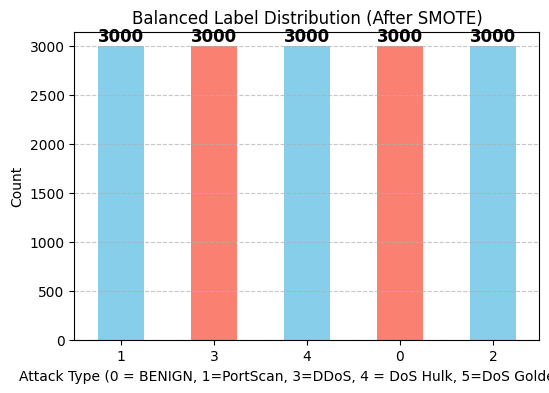

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert resampled labels to a Pandas Series
y_resampled_series = pd.Series(y_resampled)

# Count occurrences of each label after SMOTE
label_counts = y_resampled_series.value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Attack Type (0 = BENIGN, 1=PortScan, 3=DDoS, 4 = DoS Hulk, 5=DoS GoldenEye)')
plt.ylabel('Count')
plt.title('Balanced Label Distribution (After SMOTE)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show count values on top of bars
for i, v in enumerate(label_counts):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12, fontweight='bold')

plt.show()


In [28]:
# Convert resampled data into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X_clipped.columns)  # Restore column names
df_resampled['Label'] = y_resampled  # Add the resampled labels

# Describe the dataset
print(df_resampled.describe())


       Destination Port  Flow Duration  Total Fwd Packets  \
count      15000.000000   1.500000e+04       15000.000000   
mean        3807.494200   2.209078e+07           4.229400   
std        11706.580058   3.657936e+07           3.557605   
min           53.000000   2.000000e+00           1.000000   
25%           80.000000   8.400000e+01           2.000000   
50%           80.000000   1.236552e+06           3.000000   
75%          443.000000   1.541828e+07           7.000000   
max        58080.060000   1.159582e+08          21.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count            15000.000000                 15000.000000   
mean                 3.202867                   227.427133   
std                  3.314058                   489.640182   
min                  0.000000                     0.000000   
25%                  1.000000                     2.000000   
50%                  2.000000                    30.000000   
75%             

In [29]:
print(data_f['Label'].unique())  # Check what values exist in the column

[1 3 4 0 2]


SPLITTING DATASET

In [30]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42, stratify=y)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Print dataset sizes
print("Training data set size =", X_train.shape)
print("Testing data set size =", X_test.shape)

Training data set size = (10500, 78)
Testing data set size = (4500, 78)


RANDOM FOREST ISSUE SOLVED TOO MANY NAN VALUES CANT HANDLE

In [31]:
import numpy as np
import pandas as pd

print("Missing values per column:\n", X_train.isnull().sum())  # Check NaN values
print("\nInfinite values present:", np.isinf(X_train).sum().sum())  # Check inf values

Missing values per column:
 Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Active Min                     0
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Length: 78, dtype: int64

Infinite values present: 0


***RANDOM FOREST***

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model on the balanced training data
rf_model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


In [33]:
rf_pred=rf_model.predict(X_test)

In [34]:
importances = rf_model.feature_importances_

# Sort indices based on feature importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

# Generate feature names
feature_names = [f"Feature {i}" for i in indices]

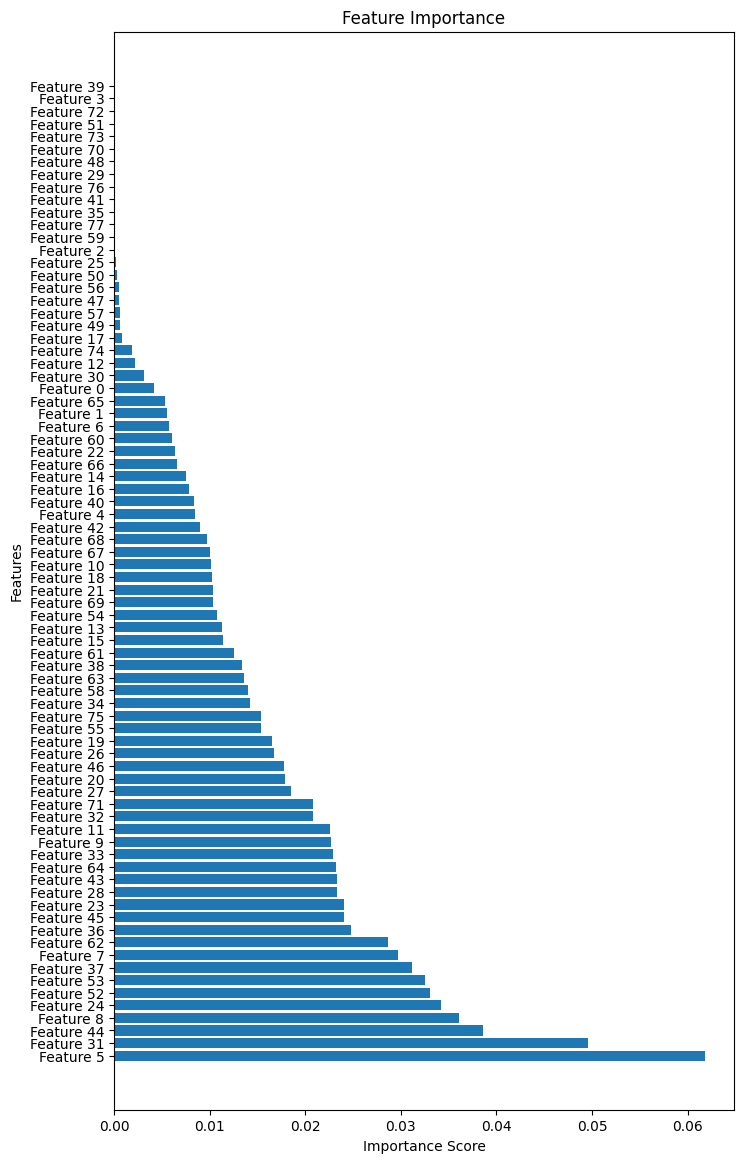

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure indices are sorted in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")

# Ensure feature_names is correctly indexed
plt.yticks(range(X_train.shape[1]), np.array(feature_names)[indices])

plt.title('Feature Importance')  # Keep only one title
plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.show()


**PLOT DECISION TREE**

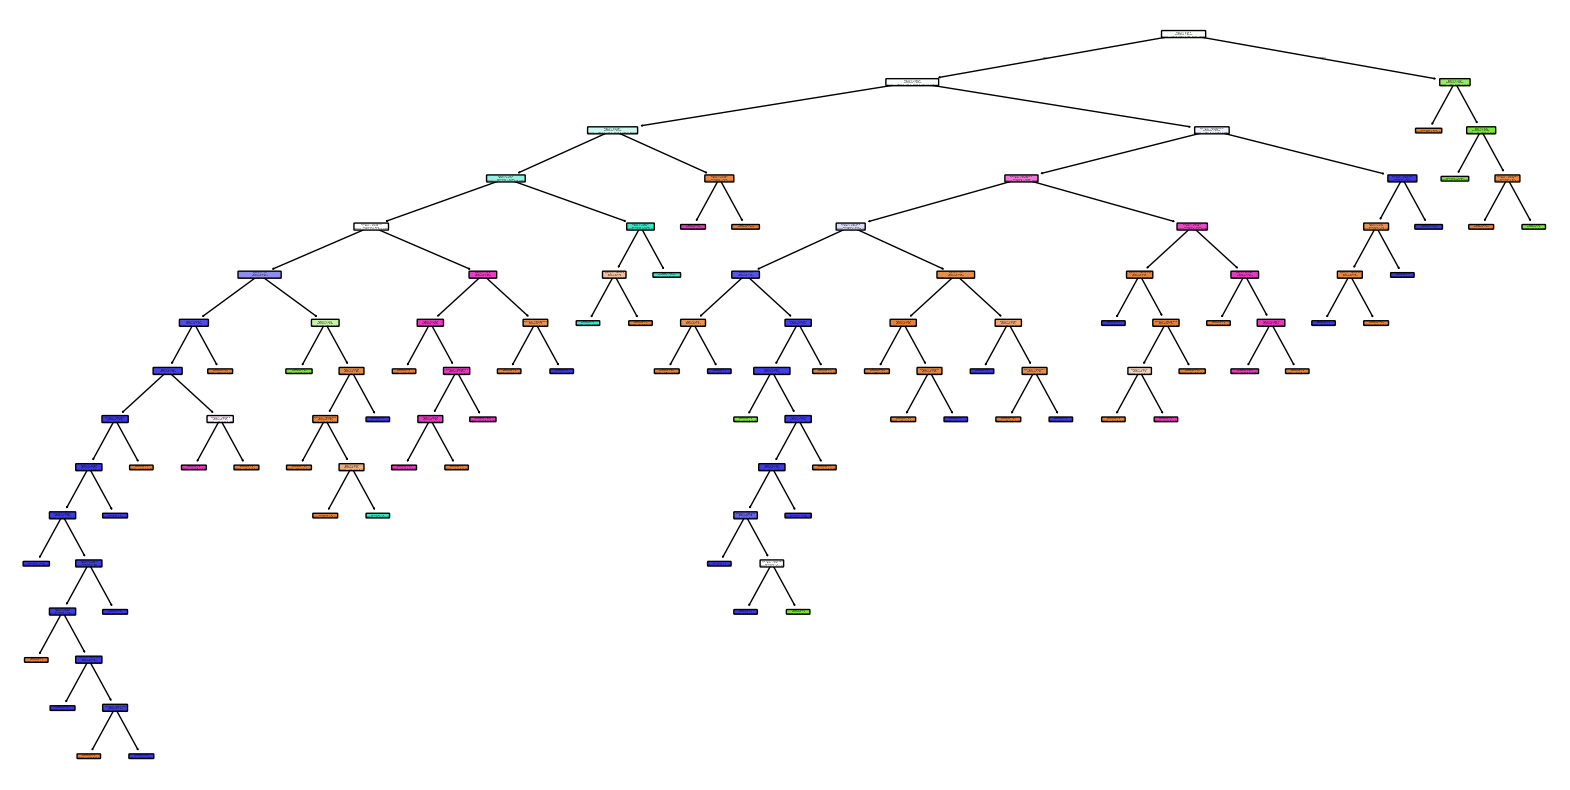

In [36]:
from sklearn.tree import plot_tree
estimator = rf_model.estimators_[0]  # Use "estimators_" instead of "estimator_"

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)

plt.show()

MODEL EVALUATION

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [38]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='macro')         # or 'weighted'
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')

In [39]:
print('\nRandomForestMetrices:')
print(f'Accuracy:{rf_accuracy:.4f}')
print(f'F1 score:{rf_f1:.4f}')
print(f'Precision:{rf_f1:.4f}')
print(f'Recall:{rf_recall:.4f}')


RandomForestMetrices:
Accuracy:0.9987
F1 score:0.9987
Precision:0.9987
Recall:0.9987


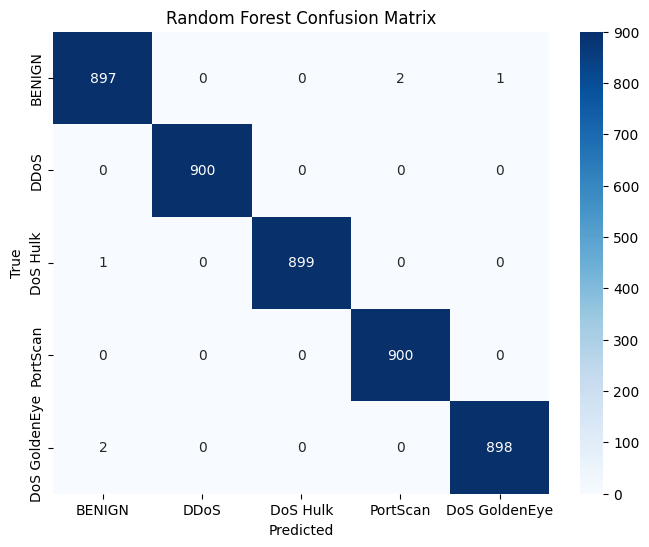

In [40]:
plot_confusion_matrix(y_test,rf_pred,['BENIGN', 'DDoS', 'DoS Hulk', 'PortScan', 'DoS GoldenEye'],'Random Forest Confusion Matrix')

***LOGISTIC REGRESSION***

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize features to improve convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increase max_iter to allow more iterations for convergence
lr_model = LogisticRegression(random_state=42, max_iter=500)  # Default is 100

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression training completed!")

Logistic Regression training completed!


EVALUATE LOGISTIC REGRESSION

In [42]:
lr_accuracy=accuracy_score(y_test,lr_pred)
lr_f1=f1_score(y_test,lr_pred, average='macro')
lr_precision=precision_score(y_test,lr_pred, average='macro')
lr_recall=recall_score(y_test,lr_pred, average='macro')

In [43]:
print('LOGISTIC REGRESSION:')
print(f'Accuracy:{lr_accuracy:.4f}')
print(f'F1 score:{lr_f1:.4f}')
print(f'Precision:{lr_f1:.4f}')
print(f'Recall:{lr_recall:.4f}')

LOGISTIC REGRESSION:
Accuracy:0.9936
F1 score:0.9935
Precision:0.9935
Recall:0.9936


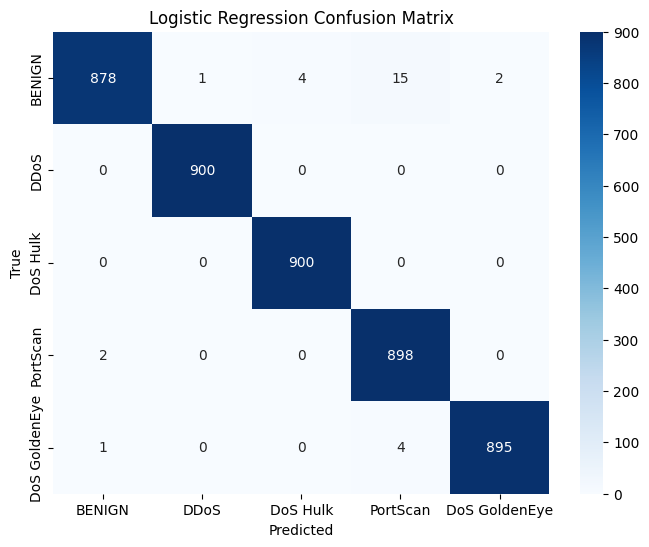

In [44]:
plot_confusion_matrix(y_test,lr_pred,['BENIGN', 'DDoS', 'DoS Hulk', 'PortScan', 'DoS GoldenEye'],'Logistic Regression Confusion Matrix')

***NEURAL NETWORK***

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Standardize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increase max_iter to allow more training epochs
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_pred = nn_model.predict(X_test_scaled)

print("Neural Network training completed!")

Neural Network training completed!


In [46]:
nn_accuracy=accuracy_score(y_test,nn_pred)
nn_f1=f1_score(y_test,nn_pred, average='macro')
nn_precision=precision_score(y_test,nn_pred, average='macro')
nn_recall=recall_score(y_test,nn_pred, average='macro')

In [47]:
print('NEURAL NETWORK:')
print(f'Accuracy:{nn_accuracy:.4f}')
print(f'F1 score:{nn_f1:.4f}')
print(f'Precision:{nn_f1:.4f}')
print(f'Recall:{nn_recall:.4f}')

NEURAL NETWORK:
Accuracy:0.9956
F1 score:0.9956
Precision:0.9956
Recall:0.9956


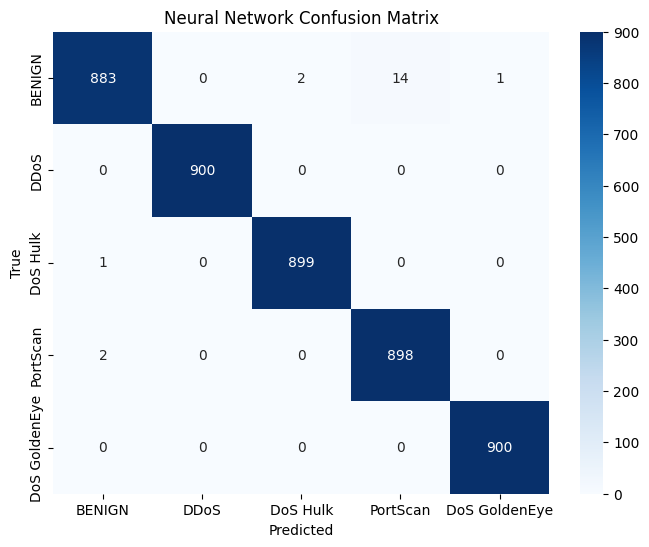

In [48]:
plot_confusion_matrix(y_test,nn_pred,['BENIGN', 'DDoS', 'DoS Hulk', 'PortScan', 'DoS GoldenEye'],'Neural Network Confusion Matrix')

Random Forest

In [49]:
rf_proba=rf_model.predict_proba(X_test)

Logistic Regression

In [50]:
lr_proba=lr_model.predict_proba(X_test_scaled)

Neural Network

In [51]:
nn_proba=nn_model.predict_proba(X_test_scaled)

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize y_test for multiclass ROC computation
n_classes = len(np.unique(y_test))  # Get number of classes
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Convert to one-hot encoding

# Compute ROC curves and AUC scores for each class
rf_fpr, rf_tpr, rf_auc = {}, {}, {}
lr_fpr, lr_tpr, lr_auc = {}, {}, {}
nn_fpr, nn_tpr, nn_auc = {}, {}, {}

for i in range(n_classes):
    rf_fpr[i], rf_tpr[i], _ = roc_curve(y_test_bin[:, i], rf_proba[:, i])
    rf_auc[i] = auc(rf_fpr[i], rf_tpr[i])

    lr_fpr[i], lr_tpr[i], _ = roc_curve(y_test_bin[:, i], lr_proba[:, i])
    lr_auc[i] = auc(lr_fpr[i], lr_tpr[i])

    nn_fpr[i], nn_tpr[i], _ = roc_curve(y_test_bin[:, i], nn_proba[:, i])
    nn_auc[i] = auc(nn_fpr[i], nn_tpr[i])


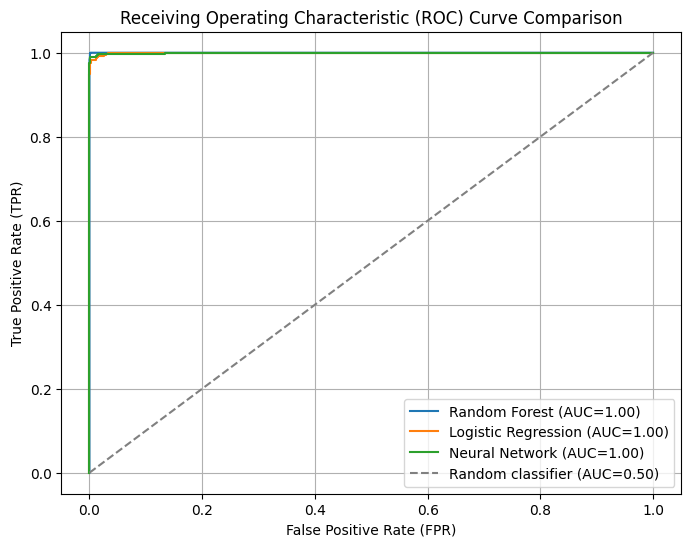

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Corrected label argument (using an example class index, e.g., class 0)
plt.plot(rf_fpr[0], rf_tpr[0], label=f'Random Forest (AUC={rf_auc[0]:.2f})')
plt.plot(lr_fpr[0], lr_tpr[0], label=f'Logistic Regression (AUC={lr_auc[0]:.2f})')
plt.plot(nn_fpr[0], nn_tpr[0], label=f'Neural Network (AUC={nn_auc[0]:.2f})')
# plt.plot(svm_fpr[0], svm_tpr[0], label=f'SVM (AUC={svm_auc[0]:.2f})')  # Uncomment if needed

# Plot settings
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label='Random classifier (AUC=0.50)')  # Diagonal reference line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiving Operating Characteristic (ROC) Curve Comparison')
plt.legend()
plt.grid()
plt.show()


***Compute Performance Metrics***

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multiclass
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"📌 {model_name} Performance:")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ Precision: {precision:.4f}")
    print(f"✅ Recall: {recall:.4f}")
    print(f"✅ F1 Score: {f1:.4f}")
    print("-" * 40)

# Evaluate all models
evaluate_model("Random Forest", y_test, rf_model.predict(X_test))
evaluate_model("Logistic Regression", y_test, lr_model.predict(X_test_scaled))
evaluate_model("Neural Network", y_test, nn_model.predict(X_test_scaled))

📌 Random Forest Performance:
✅ Accuracy: 0.9987
✅ Precision: 0.9987
✅ Recall: 0.9987
✅ F1 Score: 0.9987
----------------------------------------
📌 Logistic Regression Performance:
✅ Accuracy: 0.9936
✅ Precision: 0.9936
✅ Recall: 0.9936
✅ F1 Score: 0.9935
----------------------------------------
📌 Neural Network Performance:
✅ Accuracy: 0.9956
✅ Precision: 0.9956
✅ Recall: 0.9956
✅ F1 Score: 0.9956
----------------------------------------


***Plot Confusion Matrices***

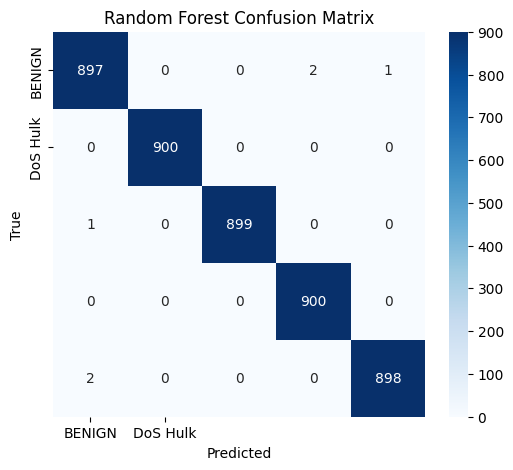

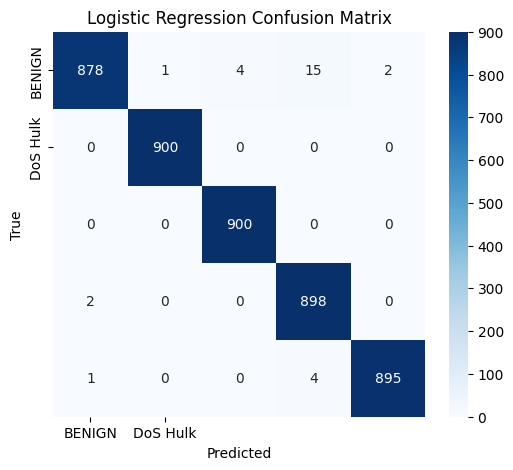

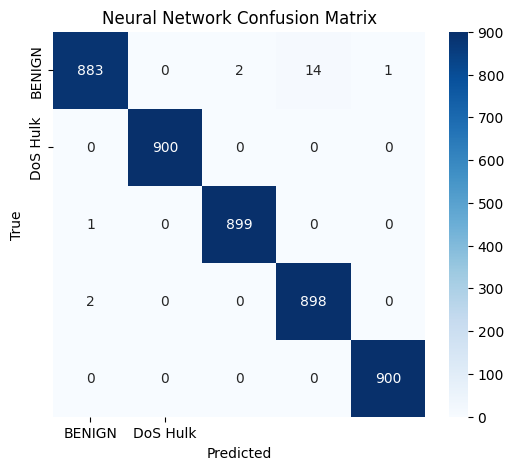

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrices
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'DoS Hulk'], yticklabels=['BENIGN', 'DoS Hulk'])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Confusion matrices for each model
plot_conf_matrix(y_test, rf_model.predict(X_test), "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, lr_model.predict(X_test_scaled), "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, nn_model.predict(X_test_scaled), "Neural Network Confusion Matrix")


***Compare ROC Curves***

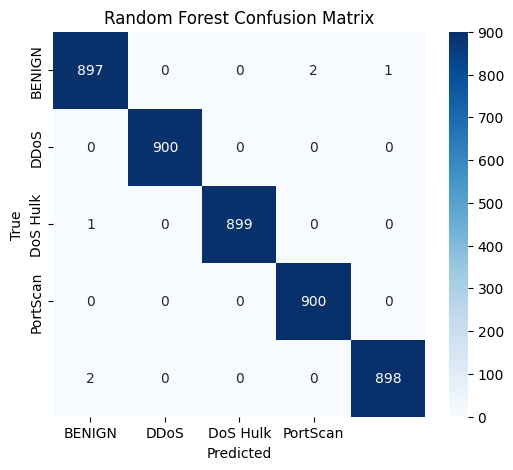

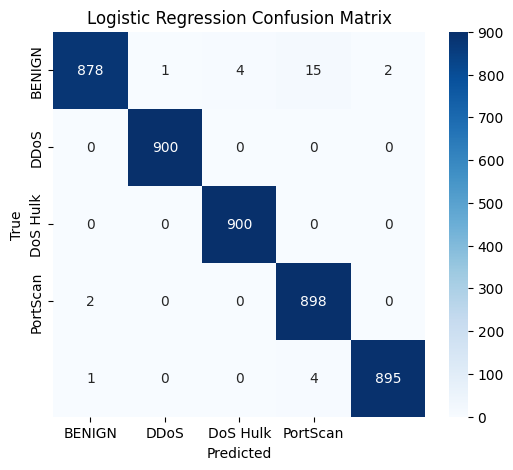

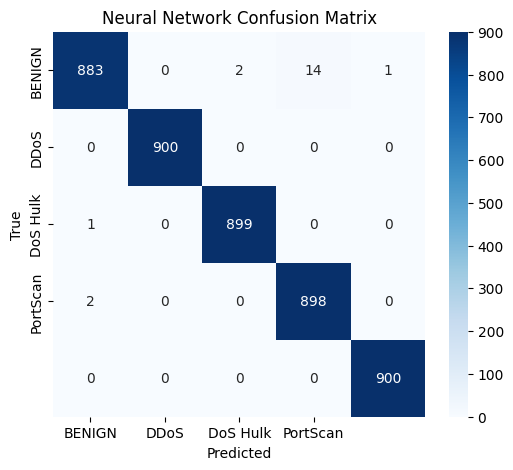

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrices
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["BENIGN", "DDoS", "DoS Hulk", "PortScan"], yticklabels=["BENIGN", "DDoS", "DoS Hulk", "PortScan"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Confusion matrices for each model
plot_conf_matrix(y_test, rf_model.predict(X_test), "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, lr_model.predict(X_test_scaled), "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, nn_model.predict(X_test_scaled), "Neural Network Confusion Matrix")

***SAVE THE MODELS***

***Scalar path***

In [57]:
import joblib
from sklearn.preprocessing import StandardScaler  # Import scaler if used

# Assuming you used a scaler during training
scaler = StandardScaler()

# Fit scaler on training data before training the model
X_train_scaled = scaler.fit_transform(X_train)

# Train models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train_scaled, y_train)
nn_model.fit(X_train_scaled, y_train)

# Save models
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(nn_model, 'neural_network_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Models saved successfully!")
print("Models and scaler saved successfully!")

Models saved successfully!
Models and scaler saved successfully!


In [58]:
# Load Random Forest
rf_model_loaded = joblib.load('random_forest_model.pkl')

# Load Logistic Regression
lr_model_loaded = joblib.load('logistic_regression_model.pkl')

# Load Neural Network
nn_model_loaded = joblib.load('neural_network_model.pkl')

print("Models loaded successfully!")

Models loaded successfully!


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Label mapping (as you mentioned)
label_mapping = {
    0: 'BENIGN',
    1: 'PortScan',
    2: 'DDoS',
    3: 'DoS Hulk',
    4: 'DoS GoldenEye'
}

# Feature names from your dataset
feature_names = ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
                 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max',
                 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std',
                 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean',
                 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean',
                 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
                 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
                 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
                 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
                 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
                 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
                 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
                 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size',
                 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
                 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
                 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
                 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
                 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean',
                 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

# ⚠️ Make sure X_test_scaled is already scaled using the same scaler you used during training

# Create DataFrame with correct feature names (Optional, mostly for readability)
new_data = pd.DataFrame(X_test_scaled, columns=feature_names)
new_data_rf = pd.DataFrame(X_test, columns=feature_names)

new_data_np = new_data.values  # For Logistic Regression & NN
new_data_np_rf = new_data_rf # For Logistic Regression & NN

# ✅ Predict with all 3 models
rf_pred = rf_model_loaded.predict(new_data_rf)
lr_pred = lr_model_loaded.predict(new_data_np)
nn_pred = nn_model_loaded.predict(new_data_np)

# Pick one sample (e.g., the first row)
i = 0

# ✅ Print predictions
print("🔹 Random Forest Prediction:", label_mapping.get(rf_pred[i], "Unknown"))
print("🔹 Logistic Regression Prediction:", label_mapping.get(lr_pred[i], "Unknown"))
print("🔹 Neural Network Prediction:", label_mapping.get(nn_pred[i], "Unknown"))

# ✅ Print prediction probabilities
print("\n🔸 Random Forest Probabilities:", rf_model_loaded.predict_proba(X_test)[i])
print("🔸 Logistic Regression Probabilities:", lr_model_loaded.predict_proba(new_data_np)[i])
print("🔸 Neural Network Probabilities:", nn_model_loaded.predict_proba(new_data_np)[i])


🔹 Random Forest Prediction: DDoS
🔹 Logistic Regression Prediction: DDoS
🔹 Neural Network Prediction: DDoS

🔸 Random Forest Probabilities: [0. 0. 1. 0. 0.]
🔸 Logistic Regression Probabilities: [1.13765716e-15 3.78368182e-06 9.99841072e-01 1.55141541e-04
 2.89086494e-09]
🔸 Neural Network Probabilities: [2.74591516e-10 7.39542566e-06 9.99935008e-01 5.75960195e-05
 4.25308608e-23]


In [77]:
print("Number of features used in training:", len(X_train.columns))
print("Feature names:", list(X_train.columns))


Number of features used in training: 78
Feature names: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Coun

In [78]:
# Get prediction probabilities
soft_preds1 = rf_model_loaded.predict_proba(X_test)
soft_preds2 = lr_model_loaded.predict_proba(X_test_scaled)
soft_preds3 = nn_model_loaded.predict_proba(X_test_scaled)

# Find borderline cases (model unsure: 0.4 < prob < 0.6)
borderline_rf = np.where((soft_preds1[:, 1] > 0.4) & (soft_preds1[:, 1] < 0.6))[0]
borderline_lr = np.where((soft_preds2[:, 1] > 0.4) & (soft_preds2[:, 1] < 0.6))[0]
borderline_nn = np.where((soft_preds3[:, 1] > 0.4) & (soft_preds3[:, 1] < 0.6))[0]

# Print top 3 borderline samples from each model
print("\n🔍 Random Forest borderline predictions:")
for idx in borderline_rf[:3]:
    print(f"Sample {idx}: Prob = {soft_preds1[idx]}")

print("\n🔍 Logistic Regression borderline predictions:")
for idx in borderline_lr[:3]:
    print(f"Sample {idx}: Prob = {soft_preds2[idx]}")

print("\n🔍 Neural Network borderline predictions:")
for idx in borderline_nn[:3]:
    print(f"Sample {idx}: Prob = {soft_preds3[idx]}")



🔍 Random Forest borderline predictions:

🔍 Logistic Regression borderline predictions:
Sample 448: Prob = [4.53089400e-01 5.42922309e-01 4.56114167e-09 3.89610514e-03
 9.21816125e-05]
Sample 1427: Prob = [4.44872215e-01 5.51090766e-01 4.70667400e-09 3.94670226e-03
 9.03115749e-05]
Sample 1612: Prob = [4.37824723e-01 5.59601052e-01 2.30171821e-03 2.72506037e-04
 1.28068907e-11]

🔍 Neural Network borderline predictions:


In [79]:
# import numpy as np
# import pandas as pd

# # Get the actual feature names from training data
# feature_names = list(X_train.columns)  # Ensure these match your trained model

# # Example BENIGN sample with exactly 78 values
# benign_sample = np.array([[80, 100000, 10, 8, 2000, 1500, 500, 100, 300, 50,
#                            400, 100, 250, 60, 50000, 100, 2000, 500, 10000, 50,
#                            5000, 1000, 250, 5000, 50, 4000, 900, 300, 5000, 100,
#                            0, 0, 0, 0, 20, 20, 50, 30, 50, 1000, 500, 200, 0, 0, 0, 0, 1, 0, 0,
#                            0, 10, 300, 200, 150, 20, 0, 0, 0, 0, 0, 0, 5, 1000, 5, 1500,
#                            1024, 512, 5, 10, 500, 50, 2000, 100, 0, 0, 0, 0, 0]])

# import numpy as np

# dos_hulk_like_sample = np.array([[
#     80,             # Destination Port
#     50000000,       # Flow Duration
#     1200, 50,       # Total Fwd Packets, Total Backward Packets
#     60000, 2000,    # Total Length of Fwd/Bwd Packets
#     1500, 50,       # Fwd Packet Length Max, Min
#     600, 300,       # Fwd Packet Length Mean, Std
#     500, 40,        # Bwd Packet Length Max, Min
#     200, 100,       # Bwd Packet Length Mean, Std
#     2e6, 3000,      # Flow Bytes/s, Packets/s (very high)
#     10, 5,          # Flow IAT Mean, Std
#     100, 1,         # Flow IAT Max, Min
#     20000, 10, 2, 50, 1,   # Fwd IAT stats
#     500, 10, 3, 30, 1,     # Bwd IAT stats
#     1, 0,           # Fwd/Bwd PSH Flags
#     0, 0,           # Fwd/Bwd URG Flags
#     600, 300,       # Fwd/Bwd Header Length
#     1200, 20,       # Fwd/Bwd Packets/s
#     40, 1500,       # Min/Max Packet Length
#     500, 200,       # Packet Length Mean, Std
#     40000,          # Packet Length Variance
#     0, 1, 0, 1,     # FIN, SYN, RST, PSH
#     1, 0, 0, 0,     # ACK, URG, CWE, ECE
#     10, 800, 600,   # Down/Up Ratio, Avg Packet Size, Fwd Segment Size
#     200,            # Bwd Segment Size
#     600,            # Fwd Header Length.1
#     0, 0, 0,        # Fwd Bulk
#     0, 0, 0,        # Bwd Bulk
#     1200, 60000,    # Subflow Fwd Packets/Bytes
#     50, 2000,       # Subflow Bwd Packets/Bytes
#     8192, 0,        # Init_Win_bytes_forward/backward
#     5,              # act_data_pkt_fwd
#     20,             # min_seg_size_forward
#     100, 10,        # Active Mean/Std
#     200, 50,        # Active Max/Min
#     100000, 50000,  # Idle Mean/Std
#     200000, 10000   # Idle Max/Min
# ]])




# # Convert both samples to DataFrames
# benign_df = pd.DataFrame(benign_sample, columns=feature_names)
# dos_hulk_df = pd.DataFrame(dos_hulk_like_sample, columns=feature_names)

# benign_scaled = scaler.transform(benign_df)
# dos_hulk_scaled = scaler.transform(dos_hulk_df)


# # Predict using trained models
# rf_pred_benign = rf_model_loaded.predict(benign_scaled)
# lr_pred_benign = lr_model_loaded.predict(benign_scaled)
# nn_pred_benign = nn_model_loaded.predict(benign_scaled)

# rf_pred_dos_hulk = rf_model_loaded.predict(dos_hulk_scaled)
# lr_pred_dos_hulk = lr_model_loaded.predict(dos_hulk_scaled)
# nn_pred_dos_hulk = nn_model_loaded.predict(dos_hulk_scaled)

# def print_preds(name, rf, lr, nn):
#     print(f"\n📌 **{name} Sample Predictions**")
#     print("🔹 Random Forest Prediction:", rf)
#     print("🔹 Logistic Regression Prediction:", lr)
#     print("🔹 Neural Network Prediction:", nn)

# print_preds("Benign", rf_pred_benign[0], lr_pred_benign[0], nn_pred_benign[0])
# print_preds("DoS Hulk", rf_pred_dos_hulk[0], lr_pred_dos_hulk[0], nn_pred_dos_hulk[0])


In [80]:
# Get actual examples (real distributions)
real_benign = data_f[data_f['Label'] == 0].sample(1).drop(columns=['Label'])
real_portscan = data_f[data_f['Label'] == 1].sample(1).drop(columns=['Label'])
real_ddos = data_f[data_f['Label'] == 2].sample(1).drop(columns=['Label'])
real_dos_hulk = data_f[data_f['Label'] == 3].sample(1).drop(columns=['Label'])
real_dos_goldeneye = data_f[data_f['Label'] == 4].sample(1).drop(columns=['Label'])

# Scale
real_benign_scaled = scaler.transform(real_benign)
real_portscan_scaled = scaler.transform(real_portscan)
real_ddos_scaled = scaler.transform(real_ddos)
real_dos_hulk_scaled = scaler.transform(real_dos_hulk)
real_dos_goldeneye_scaled = scaler.transform(real_dos_goldeneye)

# Convert scaled data to numpy array (removes feature names)
real_benign_scaled_np = real_benign_scaled[0].reshape(1, -1)
real_portscan_scaled_np = real_portscan_scaled[0].reshape(1, -1)
real_ddos_scaled_np = real_ddos_scaled[0].reshape(1, -1)
real_dos_hulk_scaled_np = real_dos_hulk_scaled[0].reshape(1, -1)
real_dos_goldeneye_scaled_np = real_dos_goldeneye_scaled[0].reshape(1, -1)

# Predict with Random Forest
print("\nRandom Forest")
print("Real Benign Prediction (RF):", rf_model_loaded.predict(real_benign))
print("Real portscan Prediction (RF):", rf_model_loaded.predict(real_portscan))
print("Real DDoS Prediction (RF):", rf_model_loaded.predict(real_ddos))
print("Real DoS Hulk Prediction (RF):", rf_model_loaded.predict(real_dos_hulk))
print("Real DoS Goldeneye Prediction (RF):", rf_model_loaded.predict(real_dos_goldeneye))

# Predict with Logistic Regression
print("\nLogistic Regression")
print("Real Benign Prediction (LR):", lr_model_loaded.predict(real_benign_scaled_np))
print("Real portscan Prediction (LR):", lr_model_loaded.predict(real_portscan_scaled_np))
print("Real DDoS Prediction (LR):", lr_model_loaded.predict(real_ddos_scaled_np))
print("Real DoS Hulk Prediction (LR):", lr_model_loaded.predict(real_dos_hulk_scaled_np))
print("Real DoS Goldeneye Prediction (LR):", lr_model_loaded.predict(real_dos_goldeneye_scaled_np))

# Predict with Neural Network
print("\nNeural Network")
print("Real Benign Prediction (NN):", nn_model_loaded.predict(real_benign_scaled_np))
print("Real portscan Prediction (NN):", nn_model_loaded.predict(real_portscan_scaled_np))
print("Real DDoS Prediction (NN):", nn_model_loaded.predict(real_ddos_scaled_np))
print("Real DoS Hulk Prediction (NN):", nn_model_loaded.predict(real_dos_hulk_scaled_np))
print("Real DoS Goldeneye Prediction (NN):", nn_model_loaded.predict(real_dos_goldeneye_scaled_np))



Random Forest
Real Benign Prediction (RF): [0]
Real portscan Prediction (RF): [1]
Real DDoS Prediction (RF): [2]
Real DoS Hulk Prediction (RF): [3]
Real DoS Goldeneye Prediction (RF): [4]

Logistic Regression
Real Benign Prediction (LR): [0]
Real portscan Prediction (LR): [1]
Real DDoS Prediction (LR): [2]
Real DoS Hulk Prediction (LR): [3]
Real DoS Goldeneye Prediction (LR): [4]

Neural Network
Real Benign Prediction (NN): [4]
Real portscan Prediction (NN): [1]
Real DDoS Prediction (NN): [2]
Real DoS Hulk Prediction (NN): [3]
Real DoS Goldeneye Prediction (NN): [4]


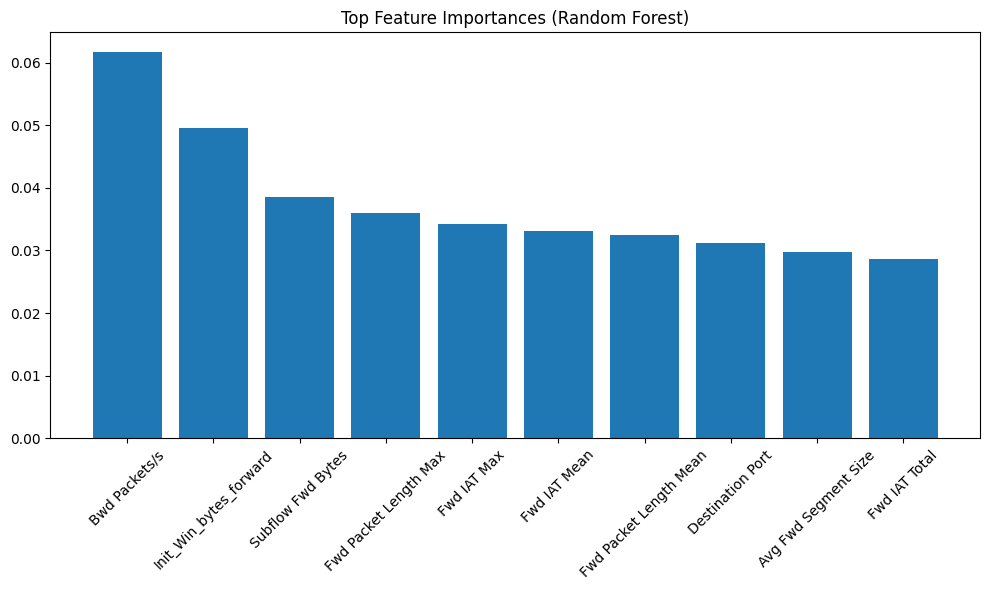

In [81]:
import matplotlib.pyplot as plt

importances = rf_model_loaded.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 10 features
top_n = 10
plt.figure(figsize=(10,6))
plt.title("Top Feature Importances (Random Forest)")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=45)
plt.tight_layout()
plt.show()


Random Forest Probabilities: [[0.66 0.12 0.   0.14 0.08]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


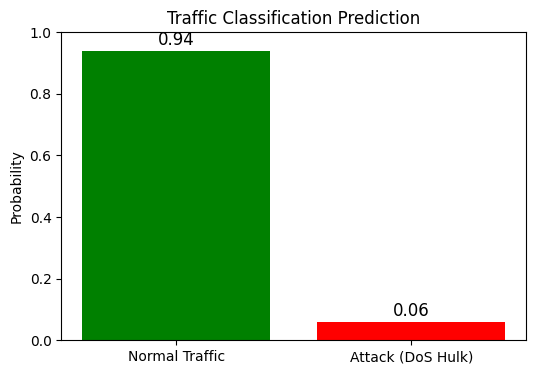


📌 **Benign Sample Probabilities**
🔹 Random Forest Probabilities: [[1. 0. 0. 0. 0.]]
🔹 Logistic Regression Probabilities: [[0. 0. 0. 0. 1.]]
🔹 Neural Network Probabilities: [[0. 0. 0. 0. 1.]]

📌 **PortScan Sample Probabilities**
🔹 Random Forest Probabilities: [[0. 1. 0. 0. 0.]]
🔹 Logistic Regression Probabilities: [[1. 0. 0. 0. 0.]]
🔹 Neural Network Probabilities: [[1. 0. 0. 0. 0.]]

📌 **DDoS Sample Probabilities**
🔹 Random Forest Probabilities: [[0. 0. 1. 0. 0.]]
🔹 Logistic Regression Probabilities: [[0. 0. 1. 0. 0.]]
🔹 Neural Network Probabilities: [[0. 0. 0. 1. 0.]]

📌 **DoS Hulk Sample Probabilities**
🔹 Random Forest Probabilities: [[0. 0. 0. 1. 0.]]
🔹 Logistic Regression Probabilities: [[0. 0. 0. 1. 0.]]
🔹 Neural Network Probabilities: [[0. 0. 0. 1. 0.]]

📌 **DoS GoldenEye Sample Probabilities**
🔹 Random Forest Probabilities: [[0. 0. 0. 0. 1.]]
🔹 Logistic Regression Probabilities: [[0. 0. 0. 0. 1.]]
🔹 Neural Network Probabilities: [[0. 0. 0. 0. 1.]]


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define feature names used in training (adjust based on your model)
feature_names = [
    "Destination Port", "Flow Duration", "Total Fwd Packets", "Total Backward Packets",
    "Total Length of Fwd Packets", "Total Length of Bwd Packets", "Fwd Packet Length Max",
    "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std",
    "Bwd Packet Length Max", "Bwd Packet Length Min", "Bwd Packet Length Mean",
    "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s", "Flow IAT Mean",
    "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean",
    "Fwd IAT Std", "Fwd IAT Max", "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean",
    "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags",
    "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length",
    "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length", "Max Packet Length",
    "Packet Length Mean", "Packet Length Std", "Packet Length Variance",
    "FIN Flag Count", "SYN Flag Count", "RST Flag Count", "PSH Flag Count",
    "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count",
    "Down/Up Ratio", "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size",
    "Fwd Header Length.1", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk",
    "Fwd Avg Bulk Rate", "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk",
    "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes",
    "Subflow Bwd Packets", "Subflow Bwd Bytes", "Init_Win_bytes_forward",
    "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward",
    "Active Mean", "Active Std", "Active Max", "Active Min",
    "Idle Mean", "Idle Std", "Idle Max", "Idle Min"
]

# Create a single row of input data with random values (replace with real packet data)
input_data = pd.DataFrame([np.random.rand(len(feature_names))], columns=feature_names)

# Scale the data for Logistic Regression and Neural Network (which require scaling)
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data)

# Ensure rf_model is trained before calling predict_proba()
# Predict probabilities using the scaled input data for all models
rf_probs = rf_model.predict_proba(input_data_scaled)
print("Random Forest Probabilities:", rf_probs)

# Probability values for visualization (example output)
classes = ["Normal Traffic", "Attack (DoS Hulk)"]
probs = [0.94, 0.06]  # Example probability output from the model

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(classes, probs, color=['green', 'red'])

# Labels and title
plt.ylabel("Probability")
plt.title("Traffic Classification Prediction")
plt.ylim(0, 1)  # Probability range (0 to 1)

# Display probability values on top of bars
for i, v in enumerate(probs):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', fontsize=12)

# Show plot
plt.show()

# Sample data for PortScan, DDoS, and DoS GoldenEye
benign_df = data_f[data_f['Label'] == 0].sample(1).drop(columns=['Label'])
portscan_df = data_f[data_f['Label'] == 1].sample(1).drop(columns=['Label'])
ddos_df = data_f[data_f['Label'] == 2].sample(1).drop(columns=['Label'])
dos_goldeneye_df = data_f[data_f['Label'] == 4].sample(1).drop(columns=['Label'])
dos_hulk_df = data_f[data_f['Label'] == 3].sample(1).drop(columns=['Label'])

# Scale the sample data for Logistic Regression and Neural Network
benign_df_scaled = scaler.transform(benign_df)
portscan_df_scaled = scaler.transform(portscan_df)
ddos_df_scaled = scaler.transform(ddos_df)
dos_goldeneye_df_scaled = scaler.transform(dos_goldeneye_df)
dos_hulk_df_scaled = scaler.transform(dos_hulk_df)

# Now predict the probabilities for each sample (scaled data for LR and NN)
rf_probs_benign = rf_model_loaded.predict_proba(benign_df)  # RF doesn't need scaling
lr_probs_benign = lr_model_loaded.predict_proba(benign_df_scaled)
nn_probs_benign = nn_model_loaded.predict_proba(benign_df_scaled)

rf_probs_portscan = rf_model_loaded.predict_proba(portscan_df)  # RF doesn't need scaling
lr_probs_portscan = lr_model_loaded.predict_proba(portscan_df_scaled)
nn_probs_portscan = nn_model_loaded.predict_proba(portscan_df_scaled)

rf_probs_ddos = rf_model_loaded.predict_proba(ddos_df)  # RF doesn't need scaling
lr_probs_ddos = lr_model_loaded.predict_proba(ddos_df_scaled)
nn_probs_ddos = nn_model_loaded.predict_proba(ddos_df_scaled)

rf_probs_hulk_df = rf_model_loaded.predict_proba(dos_hulk_df)  # RF doesn't need scaling
lr_probs_hulk_df = lr_model_loaded.predict_proba(dos_hulk_df_scaled)
nn_probs_hulk_df = nn_model_loaded.predict_proba(dos_hulk_df_scaled)

rf_probs_goldeneye = rf_model_loaded.predict_proba(dos_goldeneye_df)  # RF doesn't need scaling
lr_probs_goldeneye = lr_model_loaded.predict_proba(dos_goldeneye_df_scaled)
nn_probs_goldeneye = nn_model_loaded.predict_proba(dos_goldeneye_df_scaled)

# Print the probabilities for each class
print("\n📌 **Benign Sample Probabilities**")
print("🔹 Random Forest Probabilities:", rf_probs_benign)
print("🔹 Logistic Regression Probabilities:", lr_probs_benign)
print("🔹 Neural Network Probabilities:", nn_probs_benign)

print("\n📌 **PortScan Sample Probabilities**")
print("🔹 Random Forest Probabilities:", rf_probs_portscan)
print("🔹 Logistic Regression Probabilities:", lr_probs_portscan)
print("🔹 Neural Network Probabilities:", nn_probs_portscan)

print("\n📌 **DDoS Sample Probabilities**")
print("🔹 Random Forest Probabilities:", rf_probs_ddos)
print("🔹 Logistic Regression Probabilities:", lr_probs_ddos)
print("🔹 Neural Network Probabilities:", nn_probs_ddos)

print("\n📌 **DoS Hulk Sample Probabilities**")
print("🔹 Random Forest Probabilities:", rf_probs_hulk_df)
print("🔹 Logistic Regression Probabilities:", lr_probs_hulk_df)
print("🔹 Neural Network Probabilities:", nn_probs_hulk_df)

print("\n📌 **DoS GoldenEye Sample Probabilities**")
print("🔹 Random Forest Probabilities:", rf_probs_goldeneye)
print("🔹 Logistic Regression Probabilities:", lr_probs_goldeneye)
print("🔹 Neural Network Probabilities:", nn_probs_goldeneye)


In [73]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you split into X_test and y_test
for name, model in zip(['RF', 'LR', 'NN'], [rf_model_loaded, lr_model_loaded, nn_model_loaded]):
    y_pred = model.predict(X_test_scaled)  # Use scaled if required
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



RF Classification Report
              precision    recall  f1-score   support

           0       0.20      1.00      0.33       900
           1       0.00      0.00      0.00       900
           2       0.00      0.00      0.00       900
           3       0.00      0.00      0.00       900
           4       0.00      0.00      0.00       900

    accuracy                           0.20      4500
   macro avg       0.04      0.20      0.07      4500
weighted avg       0.04      0.20      0.07      4500

Confusion Matrix:
 [[900   0   0   0   0]
 [900   0   0   0   0]
 [900   0   0   0   0]
 [900   0   0   0   0]
 [900   0   0   0   0]]

LR Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       900
           1       1.00      1.00      1.00       900
           2       1.00      1.00      1.00       900
           3       0.98      1.00      0.99       900
           4       1.00      0.99      1.00       900

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no